## <p style="text-align: right;"> &#9989; Put your name here</Lucas Victor>

# CMSE 202 Final (Section 002 - Fall 2023)

The goal of this final is to give you the opportunity to test out some of the skills that you've developed having now finished CMSE 202. In particular, you'll be committing and pushing repository changes to a GitHub repository, working with data to build a network graph, performing regression analysis, and classifying data using a machine learning classifier. You should find that you have all of the skills necessary to complete this exam having completed the second half of CMSE 202!

You are encouraged to look through the entire exam before you get started so that you can appropriately budget your time and understand the broad goals of the exam. Once you've read through it, you'll probably want to make sure you do Part 1 first to ensure that your GitHub repository is working correctly. Let your instructor know right away if you run into issues!

The exam is set up so that even if you get stuck on one part there are opportunities to get points on the other parts, so consider jumping ahead if you feel like you aren't making progress and then come back later if you have time.

**Important note about using online resources**: This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. **However**: The use of any person-to-person communication software is absolutely not acceptable. If you are seen accessing your email, using a chat program (e.g. Slack), or any sort of collaborative cloud storage or document software (e.g. Google Documents), you will be at risk for receiving a zero on the exam.

**You can also use _your version_ of past CMSE 202 assignments and the CMSE 202 course materials as a resource!**

You can also use any publicly available generative AI tool, if you find such a tool to be useful, **but you must properly cite the tool in your exam submission if you do so**.

**Keep your eyes on your screen!** Unfortunately, there isn't enough space in the room for everyone to sit at their own table so please do your best to keep your eyes on your own screen. This exam is designed to give *you* the opportunity to show the instructor what you can do and you should hold yourself accountable for maintaining a high level of academic integrity. If any of the instructors observe suspicious behavior, you will, again, risk receiving a zero. If you're completing the exam virtually, the same standards of academic integrity apply!

---
## Part 0: Academic integrity statement

Read the following statement and edit the markdown text to put your name in the statement. This is your commitment to doing your own authentic work on this exam.

> I, **Luke Victor**, affirm that this exam represents my own authetic work, without the use of any unpermitted aids or resources or person-to-person communication. I understand that this exam an an opportunity to showcase my own progress in developing and improving my computational skills and have done my best to demonstrate those skills.

---
## Part 1: Add to your Git repository to track your progress on your exam (4 points)

Before you get to far along in the exam, you're going to add it to the `cmse202-f23-turnin` repository you created in class so that you can track your progress on the exam and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-f23-turnin` repository and create a new directory called `final`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
1. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" respository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-f23-turnin`" repository inside the `final` directory that you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

&#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below.

``` bash
# Put the command for cloning your repository here!

```

---
## Part 2: Graph for the game of Risk (21 points)

In this part of the exam, we will look at the map from the board game Risk https://en.wikipedia.org/wiki/Risk_(game). In the game of Risk, players control armies and attempt to conquer the world. On each turn, players can move armies and attack territories. However, they can only move armies from one territory to an adjacent territory that they control and they can only attack an opponent's territory if it is adjacent to a territory they control. Hence, the adjacency structure plays a critical role in the game. We can thus model the map as a graph where each territory is a node and edges connect territories which are adjacent. 

<img src="https://www.ultraboardgames.com/risk/gfx/map2.jpg" width=500px alt="Image credit: https://www.ultraboardgames.com/risk/">

To help you create the Risk territory graph, I have created the following file with a list of territories that are adjacent: `https://raw.githubusercontent.com/skarnik1337/cmse202sec002f23final/main/RiskAdjacency.csv`

&#9989; **Question 2.1 (3 points)**: To get started, **download the `RiskAdjacency.csv` file and place it in the same directory as your notebook**, then **read in the `RiskAdjacency.csv` dataset** and finally **display the first and last few rows of the data**. You can use **Pandas** for this task or any other Python tool you prefer.

In [5]:
### Put your code for Question 2.1 here
### Put your code for Question 2.1 here
# Put your code here
import pandas as pd
df = pd.read_csv('RiskAdjacency.csv')

# Display the first 5 rows
print("First 5 rows:")
print(df.head())

# Display the last 5 rows
print("\nLast 5 rows:")
print(df.tail())
# Print column names
print("Column Names:", df.columns)

First 5 rows:
  Territory 1          Territory 2
0      Alaska  Northwest Territory
1      Alaska              Alberta
2     Alberta  Northwest Territory
3     Alberta              Ontario
4     Alberta           Western US

Last 5 rows:
        Territory 1  Territory 2
78  Southern Europe  Middle East
79          Ukraine  Afghanistan
80          Ukraine  Middle East
81          Ukraine         Ural
82             Siam    Indonesia
Column Names: Index(['Territory 1', 'Territory 2'], dtype='object')


You should see two columns: `Territory 1`, `Territory 2`. We will now create a `networkx` graph using this dataset.

&#9989; **Question 2.2 (4 points)**: **Create a `networkx` `Graph` object** which has a vertex for each territory and an edge between any pair of territories which are adjacent. The resulting graph should now have an edge per entry in the dataset and the set of all names should be the set of all nodes.

One way to do this is to start with an empty `Graph`. Then, loop through each row of the dataset and add edges between the two territories listed on each line. There are of course other solutions.

In [6]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Initialize an empty Graph object
G = nx.Graph()


for _, row in df.iterrows():
    territory1 = row['Territory 1']
    territory2 = row['Territory 2']
        # Add the territories as nodes to the graph
    G.add_node(territory1)
    G.add_node(territory2)

        # Add an edge between the territories
    G.add_edge(territory1, territory2)

# Print the number of nodes and edges in the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


Number of nodes: 42
Number of edges: 83


We will now visualize the graph.

&#9989; **Question 2.3 (3 points)**: First, **run the code cell immediately below**. Next, in the code cell after that one, **create a large matplotlib figure** for drawing the graph. Finally, **draw the graph** using `networkx` and set the **positions** of the nodes using the `locations` dictionary . (Partial credit will be given if you don't adjust the figure size or if you can't plot the nodes in the specified locations.) If you did everything correctly, you should get something like this: <img src=https://i.ibb.co/cKWBxx7/Risk-Graph.png width=400px>

In [7]:
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!
locations = {"Afghanistan":(537,-193),"Alaska":(45,-20),"Alberta":(112,-123),"Argentina":(201,-434),"Brazil":(234,-351),
             "Central America":(120,-257),"China":(629,-234),"Congo":(422,-404),"East Africa":(468,-374),
             "Eastern Australia":(748,-451),"Eastern US":(171,-204),"Egypt":(426,-312),"Great Britain":(313,-165),
             "Greenland":(270,-47),"Iceland":(334,-103),"India":(578,-277),"Indonesia":(658,-391),"Irkutsk":(649,-126),
             "Japan":(738,-190),"Kamchatka":(721,-20),"Madagascar":(506,-474),"Middle East":(495,-266),
             "Mongolia":(653,-182),"New Guinea":(730,-371),"North Africa":(367,-343),"Northern Europe":(393,-180),
             "Northwest Territory":(130,-76),"Ontario":(164,-134),"Peru":(197,-380),"Quebec":(221,-134),
             "Scandinavia":(399,-94),"Siam":(643,-301),"Siberia":(592,-79),"South Africa":(429,-474),
             "Southern Europe":(400,-225),"Ukraine":(470,-129),"Ural":(549,-124),"Venezuela":(176,-302),
             "Western Australia":(692,-476),"Western Europe":(337,-237),"Western US":(119,-180),"Yakursk":(657,-59)}
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!

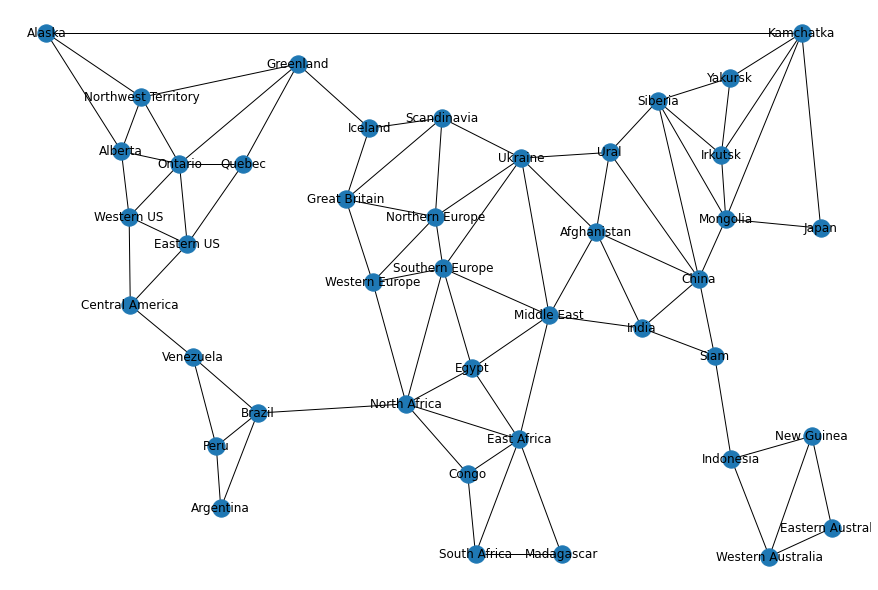

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a large figure for plotting
plt.figure(figsize=(12, 8))

# Draw the graph with node positions
nx.draw(G, pos=locations, with_labels=True)

# Display the plot
plt.show()


---

### For each part of Questions 2.4, use a short amount of networkx code to find answer. Note that you must use a networkx method to receive credit, and answers based on using the original csv file, the DataFrame, or the plot in Question 2.3 will not receive credit.

Note that if you couldn't create the `RiskGraph` correctly, you can still receive credit on each part of Question 2.4 by writing code that would have given the correct answer if your `RiskGraph` was correct.

&#9989; **Question 2.4.1 (1 point)** How many territories are in the game of Risk?

In [9]:
### Put your code for Question 2.4.1 here
print(f"Number of nodes: {G.number_of_nodes()}")

Number of nodes: 42


&#9989; **Question 2.4.2 (1 point)** True or False?: The territories `South Africa` and `Madagascar` are adjacent.

In [10]:
### Put your code for Question 2.4.2 here
G.add_edges_from([
    ("South Africa", "Madagascar"),
    # Add other edges as needed
])

# Check if the edge exists
are_adjacent = G.has_edge("South Africa", "Madagascar")

print("Are South Africa and Madagascar adjacent?", are_adjacent)

Are South Africa and Madagascar adjacent? True


&#9989; **Question 2.4.3 (1 point)** How many territories are adjacent to `Ontario`? 

&#9989; **Question 2.4.4 (2 points)** List all territories that are neighbors with `Siam`. 

**Hint**: The `list()` method and the `all_neighbors()` method in `networkx` will be useful for answering this question.

In [11]:
siam_neighbors = list(G.neighbors("Siam"))

# Print the list of neighbors
print("Neighbors of Siam:", siam_neighbors)

Neighbors of Siam: ['China', 'India', 'Indonesia']


&#9989; **Question 2.4.5 (2 points)** What is the shortest path between `Eastern Australia` and `Eastern US`?

In [12]:
### Put your code for Question 2.4.5 here
shortest_path = nx.shortest_path(G, source="Eastern Australia", target="Eastern US")

# Print the shortest path
print("Shortest path:", shortest_path)

Shortest path: ['Eastern Australia', 'New Guinea', 'Indonesia', 'Siam', 'China', 'Mongolia', 'Kamchatka', 'Alaska', 'Alberta', 'Ontario', 'Eastern US']


&#9989; **Question 2.4.6 (2 points)** List every territory that is adjacent to exactly 5 other territories.

**Hint**: You'll likely want to loop over all territories in `RiskGraph.nodes()` and check which ones have a degree of 5.

In [16]:
### Put your code for Question 2.4.6 here
# Find territories with exactly 5 neighbors
RiskGraph = G
te = [territory for territory in RiskGraph.nodes() if RiskGraph.degree(territory) == 5]

# Print the result
print("Territories with exactly 5 neighbors:", te)

Territories with exactly 5 neighbors: ['Northern Europe', 'Afghanistan', 'Mongolia', 'Siberia', 'Kamchatka']


---

&#9989; **Question 2.5 (2 points)**: Suppose we played a version of Risk where some paths between territories were only traversable in one direction (example: an army in `"North Africa"` could attack `"Brazil"` but an army in `"Brazil"` couldn't attack `"North Africa"`, and similarly for other pairs of territories). If we wanted to account for this in our graph model, we would need to use a class that was capable of having directed edges from one vertex to another. The `Graph` class does not support this. **Name a `networkx` class that we could use to implement such a model.**

<font size=+3>&#9998;</font> **Do This - Erase the contents of this cell and put your answer here.**

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 2**", and push the changes to GitHub.

---

---
## Part 3: Regression analysis on the moons of Saturn (25 points)

In this part of the exam, we will look at data on the moons of Saturn from this Wikipedia page https://en.wikipedia.org/wiki/Moons_of_Saturn#Confirmed. Since you have a very limited time on this exam, I have formatted most of that table into a csv file, which you can download here: `https://raw.githubusercontent.com/skarnik1337/cmse202sec002f23final/main/SaturnMoons.csv`

#9989; **Question 3.1 (3 points)**: To get started, **download the `SaturnMoons.csv` file and place it in the same directory as your notebook**, then **read in the `SaturnMoons.csv` dataset** and finally **display the first and last few rows of the data**. You can use **Pandas** for this task or any other Python tool you prefer.

In [12]:
### Put your code for Question 3.1 here
df = pd.read_csv('SaturnMoons.csv')
print("First 5 rows:")
print(df.head())

# Display the last 5 rows
print("\nLast 5 rows:")
print(df.tail())


First 5 rows:
  Order  Label        Name Absolute Magnitude Diameter (km) Mass (x10^15 kg)  \
0     1    NaN  S/2009 S 1                 20           0.3         < 0.0001   
1   NaN    NaN  (moonlets)                  —   0.04 to 0.4         < 0.0001   
2     2  XVIII         Pan                9.1          28.2             4.95   
3     3   XXXV     Daphnis                 12           7.6            0.084   
4     4     XV       Atlas               10.7          30.2              6.6   

   Semi-Major Axis (m)  Orbital Period (s)  Inclination  Eccentricity  \
0          117000000.0             40600.0        0.000        0.0000   
1          130000000.0             47500.0        0.000        0.0000   
2          134000000.0             49700.0        0.000        0.0000   
3          137000000.0             51300.0        0.004        0.0000   
4          138000000.0             52000.0        0.003        0.0012   

                            Position Discovery Year  Discoverer  


In the data table you just read in, you should see a table where each row corresponds to one of the many moons of Saturn, and the columns contain several properties of the moons including the `Semi-Major Axis (m)` and `Orbital Period (s)`.

&#9989; **Question 3.2 (4 points)**: **Make a scatter plot** with the `Semi-Major Axis (m)` on the $y$-axis and the `Orbital Period (s)` on the $x$-axis. **Be sure to give your plot a descriptive title and label your axes appropriately.**

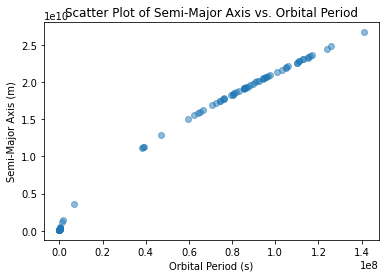

In [13]:
### Put your code for Question 3.2 here
import pandas as pd
import matplotlib.pyplot as plt
semi_major_axis = df['Semi-Major Axis (m)']
orbital_period = df['Orbital Period (s)']

plt.scatter(orbital_period, semi_major_axis, alpha=0.5)

plt.xlabel('Orbital Period (s)')
plt.ylabel('Semi-Major Axis (m)')
plt.title('Scatter Plot of Semi-Major Axis vs. Orbital Period')

# Show the plot
plt.show()


&#9989; **Question 3.3 (3 points)**: Using the `OLS` method in `statsmodels`, **perform ordinary least squares regression** with `Semi-Major Axis (m)` as the independent variable and `Orbital Period (s)` as the dependent variable. **Display the results summary**.

In [14]:
### Put your code for Question 3.3 here
import pandas as pd
import statsmodels.api as sm

df['const'] = 1

# Independent variable (X) - Semi-Major Axis (m)
X = df[['const', 'Semi-Major Axis (m)']]

# Dependent variable (y) - Orbital Period (s)
y = df['Orbital Period (s)']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Display the results summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     Orbital Period (s)   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     5673.
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.79e-77
Time:                        16:19:28   Log-Likelihood:                -1419.6
No. Observations:                  84   AIC:                             2843.
Df Residuals:                      82   BIC:                             2848.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.888e+06   1

&#9989; **Question 3.4 (2 points)**: **Based solely on the OLS results summary**, does a linear model fit this data well? Briefly justify your answer using details from the OLS results summary.

<font size=+3>&#9998;</font> Do This - Yes, linear model fits the data pretty well. It has a R squared well of 0.986

&#9989; **Question 3.5 (3 points)**: Use `plot_regress_exog` to **make a plot of the distribution of residuals** in your model fit. (It's ok if you leave the other three plots in the output.) **Explicitly resize your figure** so that it is large enough to see everything clearly.

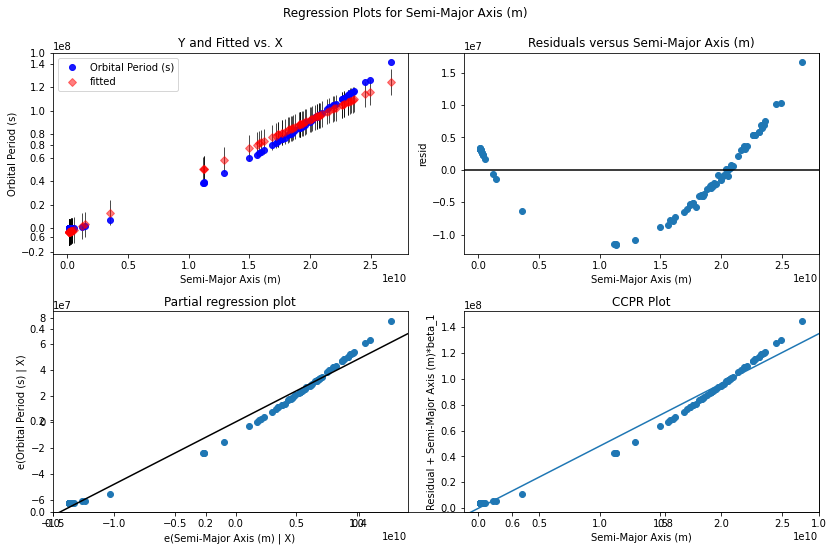

In [16]:
### Put your code for Question 3.5 here
fig, ax = plt.subplots(figsize=(12, 8))

# Plot regression results, including residuals distribution
sm.graphics.plot_regress_exog(model, 'Semi-Major Axis (m)', fig=fig)

# Show the plot
plt.show()

&#9989; **Question 3.6 (2 points)**: **Based solely on the residual plot** (and not on any Physics knowledge or reading ahead in this exam), is a linear model a good choice for this data, or do you think it would be easy to find a simple nonlinear model that fits the data better? Briefly justify your answer using details about the residual plot.

<font size=+3>&#9998;</font> Do This - Base on the plot from Y and Fitted vs, X, Partial regression plot, CCPR plot. All the scatter plot follows the y=mx^2+b line pretthy close. It means that the data fits very well. 

---

After seeing a clear trend in this data, you decide to tell your Astrophysics major friend about your exciting discovery. Unfortunately, your friend tells you that this is simply a consequence of Kepler's Third Law, and that you didn't discover anything new. :(

Kepler's Third Law states that when a body with mass $m$ orbits another body with mass $M$, the length of the semi-major axis $a$ and the orbital period $T$ are related by the equation $$a^3 = \dfrac{G(M+m)}{4\pi^2}T^2$$ where $G = 6.6743 \times 10^{-11} \tfrac{\text{meters}^3}{\text{kilograms} \cdot \text{seconds}^2}$ is the universal gravitational constant. Since the mass of Saturn is much larger than the masses of Saturn's moons, we can make the approximation $$a^3 \approx \dfrac{GM}{4\pi^2}T^2.$$ This means that $a^3$ and $T^2$ have a linear relationship!



&#9989; **Question 3.7 (3 points)**: **Make another scatter plot** of $a^3$ vs. $T^2$, i.e. plot the `Semi-Major Axis (m)` **raised to the third power** on the $y$-axis and the `Orbital Period (s)` **raised to the second power** on the $x$-axis. Again, be sure to **give your plot a descriptive title and label your axes appropriately**.

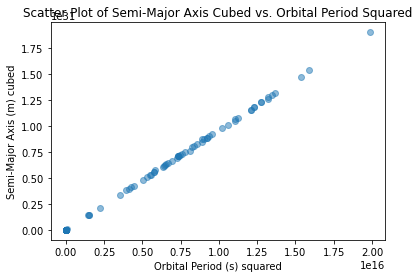

In [20]:
### Put your code for Question 3.7 here
import pandas as pd
import matplotlib.pyplot as plt
df['a_cubed'] = df['Semi-Major Axis (m)'] ** 3
df['T_squared'] = df['Orbital Period (s)'] ** 2

# Scatter plot
plt.scatter(df['T_squared'], df['a_cubed'], alpha=0.5)

# Set labels and title
plt.xlabel('Orbital Period (s) squared')
plt.ylabel('Semi-Major Axis (m) cubed')
plt.title('Scatter Plot of Semi-Major Axis Cubed vs. Orbital Period Squared')

# Show the plot
plt.show()


&#9989; **Question 3.8 (3 points)**: First, visually check that the transformed data points appear to have a more linear relationship than the original data points you plotted in Question 3.2. Then, using the `OLS` method in `statsmodels`, **perform ordinary least squares regression** with `Semi-Major Axis (m)` **raised to the third power** as the independent variable and `Orbital Period (s)` **raised to the second power** as the dependent variable, i.e. $a^3$ vs $T^2$. **Display the results summary**.

In [28]:
### Put your code for Question 3.8 here
X = df['a_cubed']
y= df['T_squared']
X = sm.add_constant(X_transformed) 

model_transformed = sm.OLS(y, X).fit()

# Display the results summary
print(model_transformed.summary())


                            OLS Regression Results                            
Dep. Variable:              T_squared   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 11 Dec 2023   Prob (F-statistic):                nan
Time:                        16:36:45   Log-Likelihood:                -2777.2
No. Observations:                  84   AIC:                             5556.
Df Residuals:                      83   BIC:                             5559.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.074e-46   8.45e-50   1270.355      0.0

&#9989; **Question 3.9 (2 points)**: Recall that Kepler's Third Law states that $a^3 \approx \dfrac{GM}{4\pi^2}T^2$, i.e., $a^3$ and $T^2$ have a linear relationship with $\text{slope} = \dfrac{GM}{4\pi^2}$ where $G = 6.6743 \times 10^{-11} \tfrac{\text{meters}^3}{\text{kilograms} \cdot \text{seconds}^2}$. Using this along with the slope you obtained from Question 3.8, **estimate the mass of Saturn in kilograms**. 

Note: If you aren't familiar with how to do calculations with units, don't worry. We've handled all the unit conversions for you, so you can just ignore the units on everything.

In [27]:
### Put your code for Question 3.9 here
# Slope obtained from the regression model
slope_m = model_transformed.params['a_cubed']
G = 6.6743e-11

# Estimate the mass of Saturn
saturn = (4 * (3.14159265359**2) * slope_m) / G

print("Mass of the Saturn:", saturn, "kilograms")


Mass of the Saturn: 0.0006150003833201361 kilograms


Remark: This method of estimating the mass of a planet is cheaper and more effective than asking the planet nicely to step on a scale.

<img src="https://spaceplace.nasa.gov/review/planets-weight/planets-weight1.en.png" width=200px alt="Image credit: https://spaceplace.nasa.gov/planets-weight/en/">

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 3**", and push the changes to GitHub.

---

---
## Part 4: Support vector machine (SVM) classification (23 points)

In this part of the exam, we will use a support vector machine (SVM) classifier to identify wine types based on various wine measurements. We will be using the UC Irvine Machine Learning Repository Wine Datasets. More info about this dataset can be found here https://archive.ics.uci.edu/ml/datasets/wine. 

&#9989; To get started, **run the code cell below**. This loads the wine dataset from `sklearn.datasets`, stores the features into a numpy array called `wine_features` and stores the class labels into a numpy array called `wine_labels`

In [3]:
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!
from sklearn.datasets import load_wine
wine_dataset = load_wine()
wine_features = wine_dataset.data
wine_labels = wine_dataset.target
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!

&#9989; **Question 4.1 (2 points)**: To verify that the dataset is loaded in properly, **display the numpy arrays `wine_features` and `wine_labels`**. Also, **display the shape of both of these arrays**. 

If everything worked properly, you should find that the shape of `wine_features` is (178,13) and the shape of `wine_labels` is (178,) 

In [7]:
# Display the arrays and their shapes
print("Shape:", wine_features.shape)
print("Shape:", wine_labels.shape)


Shape: (178, 13)
Shape: (178,)


Now that the data is properly loaded into Python, we need to perform a **train-test-split** so that we can build our SVM classifier and test it.

&#9989; **Question 4.2 (4 points)**: **Use the `train_test_split()` method** from `sklearn.model_selection` like we did in class. Use a `train_size` of `0.7` and `random_state` of `161803`. You should now have a training and a testing set with "labels" and "features" each. Finally, **print the shape of your training features, training labels, testing features, and testing labels** to verify that your train-test-split did what it was supposed to.

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    wine_features, wine_labels, train_size=0.7, random_state=161803
)

# Print the shapes of training and testing sets
print("Training Features Shape:", X_train.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Testing Labels Shape:", y_test.shape)



Training Features Shape: (124, 13)
Training Labels Shape: (124,)
Testing Features Shape: (54, 13)
Testing Labels Shape: (54,)


&#9989; **Question 4.3 (6 points)**: **Fit an SVM classifier (using the `sklearn` `SVC` class) to the dataset.** Use a `linear` kernel and set the hyper-parameter `C=10.` Then **fit your training set** and use the resulting fit to **predict your the testing set** so you get predicted labels for the testing set. Finally, **print the fit statistics** using the `confusion_matrix()` and `classification_report()` methods.

Linear Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.96      0.98        23
           2       0.93      1.00      0.96        13

    accuracy                           0.98        54
   macro avg       0.98      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54



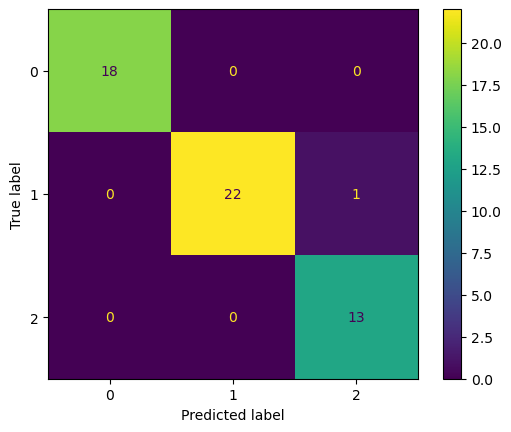

In [12]:
### Put your code for Question 4.3 here
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

predict_vectors = X_test
true_labels = y_test
param_grid = {'C': [10.0]}
# Linear kernel SVM
clf_linear = GridSearchCV(SVC(kernel='linear'), param_grid, n_jobs=-1)
clf_linear.fit(X_train, y_train)
# Print classification report
print("Linear Kernel:")
pred_labels_linear = clf_linear.predict(predict_vectors)
print(classification_report(true_labels, pred_labels_linear, zero_division=0))
# Visualize confusion matrix for the chosen model (clf)
clf = clf_linear
cm_display = ConfusionMatrixDisplay.from_estimator(clf, predict_vectors, true_labels)

&#9989; **Question 4.4 (3 points)**: Interpret the output of your classification report and the confusion matrix by answering these three questions (provide at least 1 or 2 sentences each for full credit): 
* Explain in a few sentences what you observe in the confusion matrix. 
* Would you consider this a good or a bad classifier?
* Which quantity from the classification report did you use to make this judgement?

<font size=+3>&#9998;</font> Do This - From the confusion matrix the there is only one error from matix 23. It is one. It means it is pretty accute with only one error. I would considere this a good classifer because the error are so low. It has accuracy of 98%. I used the accurcy F1 score. 

---

&#9989; **Question 4.5 (1 point)**: Suppose we wanted to try fitting a Support Vector Classifier for multiple choices of the kernel function and multiple choices for the values of the hyperparameter(s) (instead of just using a `linear` kernel with `C=10`). We could write code with nested for loops to repeat the procedure with every combination of kernel function and hyperparameter value(s) we wanted to try. Name a method built into sklearn that will do this automatically. (We used this on an in-class assignment).

<font size=+3>&#9998;</font> Do This - I think the method that we used the most in class for this is GridSearchCV. 

&#9989; **Question 4.6 (3 points)**: Both of the images below show the same two-dimensional dataset with two classes (solid blue squares and unfilled red circles) along with the decision boundary of a linear classifier. One classifier was generated via the Perceptron Learning Algorithm, and the other used a Support Vector Classifier. Which one is which? **Justify your answer!**

Classifier A          | | Classifier B
:-------------------------:|:---:|:-------------------------:
![](https://i.ibb.co/R2BBsDC/Datapoints1-A.png)  | |  ![](https://i.ibb.co/mb9vcq4/Datapoints1-B.png)

<font size=+3>&#9998;</font> Do This - 
The perceptron is A because it have a very vetical line. it is because it tend to find the linear separation. The B is SVC because it very close 

&#9989; **Question 4.7 (3 points)**: Both of the images below show the same two-dimensional dataset with two classes (solid blue squares and unfilled red circles) along with the decision boundary of a linear Support Vector Classifier. One used the hyperparameter `C = 0.1`, and the other used the hyperparameter `C = 1000`. Which one is which? **Justify your answer!**

Classifier X          | | Classifier Y
:-------------------------:|:---:|:-------------------------:
![](https://i.ibb.co/7pPCRwh/Datapoints2-A.png)  | |  ![](https://i.ibb.co/LSMBXzd/Datapoints2-B.png)

 It is likely that image A corresponds to the SVC with C = 1000, and image B corresponds to the SVC with C = 0.1. Because A is very

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 4**", and push the changes to GitHub.

---

## You're done! Congrats on finishing your CMSE 202 Final!

Make sure all of your changes to your repository are committed and pushed to GitHub. Also upload a copy of this notebook to the dropbox on D2L in case something went wrong with your repository or if you couldn't get the repository to work.